In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We have the following information in the files:

**Demographics**\
All customer ids are unique, so we know that there are 10366 customers in the database.\
For each customer, shows 
- gender (female, male or other)
- age group ('18-24', '25-34', '35-44', '45-54' or '55-65')
- country (Sweden, Norway, Finland or Denmark). 

**Referral**\
For each customer, shows 
- referall type (facebook, organic search, paid search, google ads, tv, display or bing), can also be blank

**Transactions**\
Shows all transaction for each of the customers. A data point
- customer id
- transaction type (initial, upgrade, reduction or churn)
- transaction date (can be first of each month between 2020-01-01 and 2022-12-01)
- subscription type (basic, pro or max)

**Subscription prices**\
Shows the price of each of the three subscription types (basic, pro and max) for the years 2020, 2021 and 2022. 

## **Recommendation to the client**

The data is very interesting and there are several ways it can be used to perform analyses to drive business decisions. Some examples of things that could be examined are:
- Looking at during which months customers generally upgrade or downgrade their subscription.
- Looking for correlation between price increases and customers quitting their subscriptions.
- Checking which subscription types are common in which country.
- Checking which subscription types are common in different age groups and genders. 
- Investigating how the type of referral relates to the type of subscription a customer has.  
- Calculating total revenue. 
- Predicting how how revenue would be affected by changes is pricing.
- Investigating which types of subscriptions bring in most income. 
- Finding which referral types are successful and thus worth investing in further. 

These are only some of the cases which can be analyzed through this data. Visualization could also be used to get a better grasp multiple aspects of data. It could be used to illustrate the demographics, but also how interest for different subscription types have looked over time. 

***Below is code for data exploration.***

### **Demographic data**

In [2]:
demographics = pd.read_csv('data/demographics.csv')

# Get basic information about demographics dataframe
print(f'Name of columns in data: {list(demographics.columns)}')
print(f'Number of rows in data: {len(demographics.index)}')

Name of columns in data: ['cust_id', 'customer_gender', 'age_group', 'customer_country']
Number of rows in data: 10366


In [3]:
# Check if dataframe contains nan values
if demographics.isnull().values.any():
    print('Data contains NaN values.')
else: 
    print('Data does not contain NaN values.')

# -- Handling customer ids -- 
# Remove '_cust' so that all ids have the same format
demographics['cust_id']= demographics['cust_id'].str.replace('_cust', '')

# Check that all ids are unique (should be same as length of dataframe)
ids = demographics.cust_id.unique()
if len(ids) == len(demographics.index):
    print('All ids are unique.')

Data does not contain NaN values.
All ids are unique.


Age groups: ['18-24', '25-34', '35-44', '45-54', '55-65']


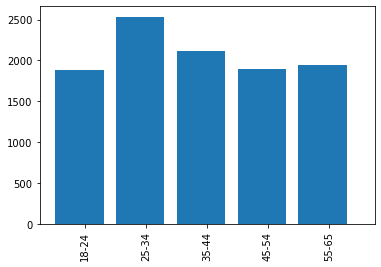

In [4]:
# -- Handling age groups -- 
# Display all age groups
age_groups = sorted(demographics.age_group.unique())
print(f'Age groups: {age_groups}')
demographics['age_group'].value_counts()

bins = np.arange(0, 6) - 0.5
width = 0.8

plt.hist(demographics['age_group'], bins=bins, width=width)
plt.xticks(np.arange(5), np.unique(demographics['age_group']), rotation=90)
plt.show()


Genders in original data: ['Female', 'Male', 'Other', 'f', 'm']


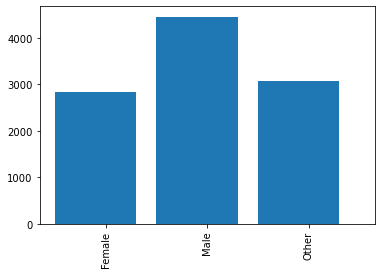

Other     4460
Female    3064
Male      2842
Name: customer_gender, dtype: int64

In [5]:
# -- Handling genders -- 
genders = sorted(demographics.customer_gender.unique())
print(f'Genders in original data: {genders}')

# Replace 'f' with 'Female' and 'm' with 'Male'
replacements = {'f': 'Female', 'm': 'Male'}
demographics['customer_gender'] = demographics['customer_gender'].replace(to_replace=replacements)

bins = np.arange(0, 4) - 0.5
width = 0.8

plt.hist(demographics['customer_gender'], bins=bins, width=width)
plt.xticks(np.arange(3), np.unique(demographics['customer_gender']), rotation=90)
plt.show()

demographics['customer_gender'].value_counts()


Countries in original data: ['Denmark' 'Norway' 'Sweden' 'Finland' 'Norge' 'Sverige']


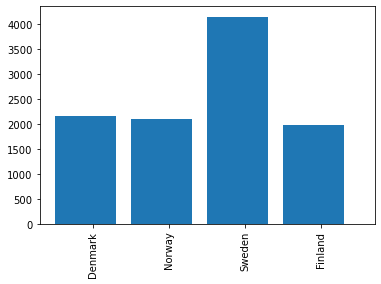

Sweden     4144
Denmark    2153
Norway     2094
Finland    1975
Name: customer_country, dtype: int64

In [6]:
# -- Handling countries -- 
# Show all countries
countries = demographics.customer_country.unique()
print(f'Countries in original data: {countries}')

# Replace 'Sverige' with 'Sweden' and 'Norge' with 'Norway'
replacements = {'Sverige': 'Sweden', 'Norge': 'Norway'}
demographics['customer_country'] = demographics['customer_country'].replace(to_replace=replacements)

demographics['customer_country'].value_counts()

# Sort unique country values in alphabetical order
unique_countries = demographics['customer_country'].unique()

bins = np.arange(0, len(unique_countries) + 1) - 0.5
width = 0.8

plt.hist(demographics['customer_country'], bins=bins, width=width)
plt.xticks(np.arange(len(unique_countries)), demographics['customer_country'].unique(), rotation=90)
plt.show()

demographics['customer_country'].value_counts()


### **Referral data**

Number of rows in dataframe: 19141
Number of unique ids in list: 10366
Data contains NaN values.


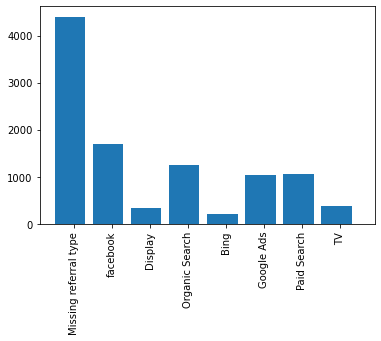

Missing referral type    4398
facebook                 1689
Organic Search           1248
Paid Search              1058
Google Ads               1033
TV                        388
Display                   340
Bing                      212
Name: referral_type, dtype: int64

In [7]:
referral = pd.read_csv('data/referral.csv')

# Rename id column so it's the same across all dataframes
referral = referral.rename(columns={"id": "cust_id"})

# Get basic information about demographics dataframe
print(f'Number of rows in dataframe: {len(referral.index)}')

# Check that all ids are unique (should be same as length of dataframe)
ids = referral.cust_id.unique()

print(f'Number of unique ids in list: {len(ids)}')
if len(ids) == len(referral.index):
    print('All ids are unique.')

# Remove '_ref' so that all ids have the same format
referral['cust_id']= referral['cust_id'].str.replace('_ref', '')

# Check if dataframe contains nan values
if referral.isnull().values.any():
    print('Data contains NaN values.')
else: 
    print('Data does not contain NaN values.')

# Removes duplicate rows
referral = referral.drop_duplicates()

referral['referral_type'] = referral['referral_type'].fillna('Missing referral type')

referral['referral_type'].value_counts()

bins = np.arange(0, 9) - 0.5
width = 0.8

plt.hist(referral['referral_type'], bins=bins, width=width)
plt.xticks(np.arange(8), referral['referral_type'].unique(), rotation=90)
plt.show()

referral['referral_type'].value_counts()


### **Transaction data**

In [8]:
dtypes = {'cust_id': 'object', 'transaction_type': 'str', 'transaction_date': 'object', 'subscription_type': 'str'}
transactions = pd.read_csv('data/transactions.csv', dtype=dtypes, parse_dates=['transaction_date'])

# Get basic information about transactions dataframe
print(f'Name of columns in dataframe: {list(transactions.columns)}')
print(f'Number of rows in dataframe: {len(transactions.index)}')
print(f'Transaction types in original data: {list(transactions.transaction_type.unique())}')
print(f'Subscription types in original data: {list(transactions.subscription_type.unique())}')


Name of columns in dataframe: ['cust_id', 'transaction_type', 'transaction_date', 'subscription_type']
Number of rows in dataframe: 19141
Transaction types in original data: ['initial', 'UPGRADE', ' ', 'REDUCTION', 'CHURN']
Subscription types in original data: ['BASIC', 'MAX', 'PRO', 'pro', 'max']


In [9]:
# Check that all ids are unique (should be same as length of dataframe)
ids = transactions.cust_id.unique()
print(f'Number of unique ids in list: {len(ids)}\n')

# Replace 'pro' with 'PRO' and 'max' with 'MAX'
replacements = {'pro': 'PRO', 'max': 'MAX'}
transactions['subscription_type'] = transactions['subscription_type'].replace(to_replace=replacements)

# Removes duplicate rows
transactions = transactions.drop_duplicates()
print(f'Number of rows after duplicates removed: {len(transactions.index)}.')

churned = transactions.loc[transactions['transaction_type'] == 'CHURN']
print(f'Number of customers who has ended subscriptions: {len(churned.index)}.')

missing_transaction = transactions.loc[transactions['transaction_type'] == ' ']
print(f'{len(missing_transaction.index)} transactions are missing transaction type.')

# Replace missing values with nan
transactions = transactions.replace(r'^\s*$', np.nan, regex=True)

Number of unique ids in list: 10366

Number of rows after duplicates removed: 19127.
Number of customers who has ended subscriptions: 2497.
47 transactions are missing transaction type.


In [10]:
transactions['transaction_type'].value_counts()

initial      10366
UPGRADE       3692
REDUCTION     2525
CHURN         2497
Name: transaction_type, dtype: int64

In [11]:
transactions['subscription_type'].value_counts()

BASIC    7053
PRO      6526
MAX      5548
Name: subscription_type, dtype: int64

### **Subscription prices**

In [12]:
subscription_prices = pd.read_json('data/subscription_prices.json')
subscription_prices

,BASIC,PRO,MAX
2020,33,65,99
2021,43,75,109
2022,53,85,119


### **Create compiled CSV**

In [13]:
# Transform subscription prices so that merge can be performed
subscription_prices = subscription_prices.stack().reset_index()
subscription_prices.columns = ['year', 'subscription_type', 'price']

# Join demographics and referral dataframes on customer id
demo_ref = pd.merge(demographics, referral, on="cust_id")

# Keep only the latest transaction for each customer, so that csv will contain the current status of each customer
latest_transaction = transactions.sort_values(['cust_id', 'transaction_date']).drop_duplicates('cust_id', keep='last')

# Join dataframe of demographics and referral dataframes with latest transaction on customer id
# If you want to keep all transactions for each customer, replace 'latest_transactions' with 'transactions'
trans_demo_ref = pd.merge(latest_transaction, demo_ref, on="cust_id")
trans_demo_ref['year'] = trans_demo_ref['transaction_date'].dt.year

In [14]:
# Create final dataframe that contains subscription prices as well
all_info = pd.merge(trans_demo_ref, subscription_prices, on=['subscription_type', 'year'], how='inner')

# The year column can be dropped as it doesn't add any information
all_info.drop('year', axis=1, inplace=True)
all_info['cust_id'] = pd.to_numeric(all_info['cust_id'])

# Sort values on customer id, resetting index
all_info.sort_values('cust_id', inplace=True, ignore_index=True)

# Write to csv file
all_info.to_csv('compiled_data.csv')
